In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [2]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=256),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [3]:
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [4]:
train_dir = '../../../Data/cat_dog/Train/'
validation_dir = '../../../Data/cat_dog/Test/'

train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
validation_dataset = datasets.ImageFolder(root=validation_dir, transform=val_transform)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def printImage(image):
    # Get one sample from the dataset
    image, label = image
    
    # Convert image tensor to numpy and transpose for matplotlib (C, H, W) → (H, W, C)
    np_image = image.numpy().transpose((1, 2, 0))
    
    # Undo normalization (reverse of Normalize([0.5]*3, [0.5]*3))
    np_image = np_image * 0.5 + 0.5
    
    # Plot
    plt.imshow(np_image)
    plt.title(f"Label: {label} ({list(train_dataset.class_to_idx.keys())[label]})")
    plt.axis('off')
    plt.show()


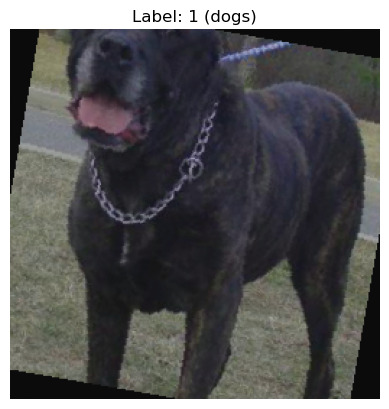

In [6]:
printImage(train_dataset[2560])

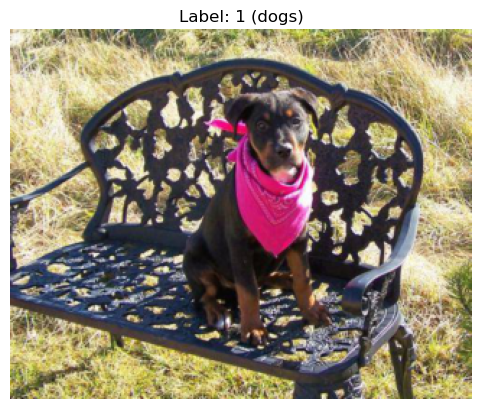

In [7]:
printImage(validation_dataset[1260])

In [8]:
import os
from torchvision.utils import save_image

os.makedirs('agumented_cat_dog',exist_ok=True)

In [9]:
target_dir = r'F:\Train_By_Torch\Data\Augmented_cat_dog'

In [10]:
for class_name in train_dataset.classes:
    os.makedirs(os.path.join(target_dir, class_name), exist_ok=True)

In [11]:
num_augmented_per_image = 5

In [13]:
for index in range(len(train_dataset)):
    image_tensor, label = train_dataset[index]
    class_name = train_dataset.classes[label]
    
    for augmented_index in range(num_augmented_per_image):
        image_tensor, _ = train_dataset[index]
        save_path = os.path.join(target_dir, class_name, f"{index}_{augmented_index}.png")
        save_image(image_tensor, save_path)
        
print("Augmented images saved successfully.")

Augmented images saved successfully.
